# Data Structure Final Project by 42153004李田洋
## 2 Priority queues

In [1]:
class Node:
    def __init__(self, key=None, next=None, pre = None):
        self.key = key
        self.next = next

#### 1: Design a complete binary tree ADT
* Based on a singly linked list
* The first element's index is 0
* Given an index i, three operations: get its parent, left child, and right child, respectively

In [2]:
class BinaryTree:
    def __init__(self) -> None:
        self.head = None
        self.tail = None
        self.count = -1
        
    def insert(self, key) -> None:
        if self.head == None:
            self.head = Node(key)
            self.tail = self.head
        else:
            newNode = Node(key)
            self.tail.next = newNode
            self.tail = newNode
        self.count += 1
        
    def getNode(self, i) -> Node:
        if i > self.count or i < 0:
            return None
        cur = self.head
        for i in range(i):
            cur = cur.next
        return cur
    
    def getParent(self, i: int) -> Node:
        if i <= 0 or i > self.count:
            return None
        idx = (i - 1) // 2
        cur = self.head
        while idx > 0:
            cur = cur.next
            idx -= 1
        return cur
  
    def getLeftChild(self, i: int) -> Node:
        idx = i * 2 + 1
        if i < 0 or idx > self.count or i > self.count: 
            return None
        cur = self.head
        while idx > 0:
            cur = cur.next
            idx -= 1
        return cur

    def getRightChild(self, i: int) -> Node:
        idx = i * 2 + 2
        if i < 0 or idx > self.count or i > self.count: 
            return None
        cur = self.head
        while idx > 0:
            cur = cur.next
            idx -= 1
        return cur

#### 2: Design a minimum priority queue
#### · insert()<br>
  Explanation: Firstly, insert the new key as a leaf node. Then bubble it up into the right place.
#### · delMin()<br>
  Explanation: 
   * Case 1: The priority queue is empty (i<0).<br>
          None can be delete.
   * Case 2: The priority queue only has one node.<br>
          The head node is the minimum. Just delete the head node. That is to set the head node and tail node equal to None.
   * Case 3: The priority queue has more than one node.<br>
          The head node is the minimum node. Swap the head node for the tail node. Then delete the tail node. Finally, use the downward bubbling method to maintain the structure of the priority queue.

In [3]:
class PriorityQueue:
    def __init__(self) -> None:
        self.bt = BinaryTree()
  
    def __swap(self, a: Node, b: Node):
        t = a.key
        a.key = b.key
        b.key = t

    def up(self, i):
        if i <= 0 or i > self.bt.count:
            return 
        cur = self.bt.getNode(i)
        parent = self.bt.getParent(i)
        if parent != None:
            if parent.key > cur.key:
                self.__swap(parent, cur)
                self.up((i - 1) // 2)

    def down(self, i):
        if i > self.bt.count:
            return
        t = i
        if i * 2 + 1 <= self.bt.count and self.bt.getLeftChild(i).key < self.bt.getNode(t).key:
            t = i * 2 + 1
        if i * 2 + 2 <= self.bt.count and self.bt.getRightChild(i).key < self.bt.getNode(t).key:
            t = i * 2 + 2
        if t != i:
            self.__swap(self.bt.getNode(t), self.bt.getNode(i))
            self.down(t)

    def insert(self, key):
        self.bt.insert(key)
        self.up(self.bt.count)

    def delMin(self):
        if self.bt.count < 0:
            return None
        minKey = self.bt.head.key
        if self.bt.count == 0:
            self.bt.head = None
            self.bt.tail = None
            self.bt.count -= 1
            return minKey
        self.__swap(self.bt.head, self.bt.tail)
        cur = self.bt.head
        while cur.next != self.bt.tail:
            cur = cur.next
        cur.next = None
        self.bt.tail = cur
        self.bt.count -= 1
        self.down(0)
        return minKey

#### 3: Analyze the time complexity
* insert(): O(nlogn)
* delMin(): O(nlogn)

#### 4: Visualization the priority queue benchmark
* test run

In [4]:
if __name__ == "__main__":
    p = PriorityQueue()
    p.insert(4)
    p.insert(45)
    p.insert(2)
    p.insert(1)
    p.insert(3)
    p.insert(333)
    p.insert(23)
    
    p.delMin()

* insert() and delMin() benchmark

element size: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
insert time: [0.0009999275207519531, 0.0019998550415039062, 0.0041544437408447266, 0.0060100555419921875, 0.010393619537353516, 0.01463460922241211, 0.019662141799926758, 0.02553272247314453, 0.033429861068725586, 0.0396120548248291, 0.04925346374511719, 0.05588936805725098, 0.06653666496276855, 0.07822680473327637, 0.08669853210449219, 0.1017143726348877, 0.11757898330688477, 0.15702533721923828, 0.1445784568786621, 0.15997028350830078]


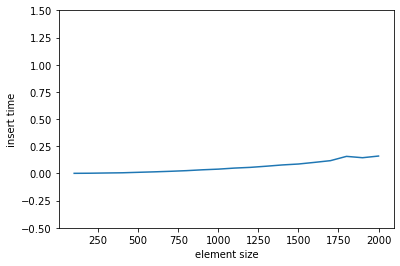

element size: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
delete time: [0.0020067691802978516, 0.007405996322631836, 0.016006946563720703, 0.02699899673461914, 0.04151320457458496, 0.05800008773803711, 0.08003473281860352, 0.10862445831298828, 0.13450241088867188, 0.16153335571289062, 0.19239234924316406, 0.23011398315429688, 0.2711470127105713, 0.31639981269836426, 0.3527553081512451, 0.4031684398651123, 0.46593260765075684, 0.5116286277770996, 0.5820639133453369, 0.6557905673980713]


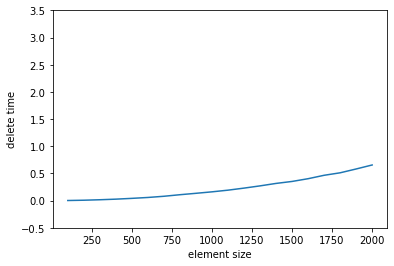

In [5]:
from time import time
import random
import matplotlib.pyplot as plt

x = []
e = 100
for i in range(20):
  x.append(e)
  e += 100
    
def test_time(fn, *args, **kwargs):
    start_time = time()
    fn(*args, **kwargs)
    end_time = time()
    return end_time - start_time

def test_insert_time(x):
    pq = PriorityQueue()
    for i in range(x):
        e = random.randint(0, 1000000)
        pq.insert(e)
    return pq

def show_insert_time(x:list):
    y = []
    for e in x:
        y.append(test_time(test_insert_time, e))
    print("element size:", x)
    print("insert time:", y)    
    plt.xlabel('element size')
    plt.ylabel('insert time')
    plt.ylim(-0.5, 1.5)
    plt.plot(x, y)
    plt.show()

def test_delete_time(pq: PriorityQueue):
    while pq.delMin() != None:
        continue

def show_delete_time(x: list):
    pqs = []
    y = []
    for e in x:
        pqs.append(test_insert_time(e))
    for pq in pqs:
        y.append(test_time(test_delete_time, pq))
    print("element size:", x)
    print("delete time:", y)    
    plt.xlabel('element size')
    plt.ylabel('delete time')
    plt.ylim(-0.5, 3.5)
    plt.plot(x, y)
    plt.show()


show_insert_time(x)
show_delete_time(x)

#### 5: Draw the tree structure

In [ ]:
from graphviz import Digraph

def dot(pq: PriorityQueue):
    g = Digraph(format='png')
    def draw(g: Digraph, pq: PriorityQueue, i: int):
        if i > pq.bt.count:
            return 
        node = pq.bt.getNode(i)
        if node != None:
            leftChild = pq.bt.getLeftChild(i)
            if leftChild != None:
                g.edge(str(node.key), str(leftChild.key))
                draw(g, pq, i * 2 + 1)
            rightChild = pq.bt.getRightChild(i)
            if rightChild != None:
                g.edge(str(node.key), str(rightChild.key))
                draw(g, pq, i * 2 + 2)
    draw(g, pq, 0)
    g.view()

p = PriorityQueue()
p.insert(4)
p.insert(45)
p.insert(2)
p.insert(1)
p.insert(3)
p.insert(333)
p.insert(23)

p.delMin()

dot(p)